# Analyze Upvote and Downvote Data to Extract Key Insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("4_voting_data.csv")
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date

In [3]:
df

,adv_id,offer_id,app_id,state,comment,ip,country_code,created_at,date
0,5ba99349-0e56-4a15-96d8-6708f21ae548,254610,rupiyo,UP,NaN,152.58.197.244,IN,2024-10-17 08:38:41.178855+00:00,2024-10-17
1,d016c006-f927-48bc-987d-40a2f3f4648b,258019,rupiyo,UP,NaN,152.59.191.187,IN,2024-10-20 03:50:17.578827+00:00,2024-10-20
2,d016c006-f927-48bc-987d-40a2f3f4648b,258634,rupiyo,UP,NaN,152.58.129.31,IN,2024-10-21 15:52:12.762049+00:00,2024-10-21
3,ed359404-3d8a-4f3e-9d4e-38e6ef575254,258019,rupiyo,UP,NaN,152.59.191.187,IN,2024-10-20 03:50:17.578827+00:00,2024-10-20
4,ed359404-3d8a-4f3e-9d4e-38e6ef575254,258634,rupiyo,UP,NaN,152.58.129.31,IN,2024-10-21 15:52:12.762049+00:00,2024-10-21
...,...,...,...,...,...,...,...,...,...
1048570,aa56ed51-6bde-4b4d-8e5d-65fe042384e8,258592,offerwall_1072,UP,NaN,59.152.120.116,IN,2024-10-19 15:27:34.559927+00:00,2024-10-19
1048571,aa56ed51-6bde-4b4d-8e5d-65fe042384e8,258685,offerwall_1072,UP,NaN,152.59.108.155,IN,2024-10-19 16:11:17.710819+00:00,2024-10-19
1048572,aa56ed51-6bde-4b4d-8e5d-65fe042384e8,259853,offerwall_1072,UP,NaN,103.242.189.33,IN,2024-10-21 06:01:57.872703+00:00,2024-10-21
1048573,aa56ed51-6bde-4b4d-8e5d-65fe042384e8,257571,offerwall_1072,UP,NaN,103.242.189.33,IN,2024-10-21 06:02:14.090990+00:00,2024-10-21


#### We start by cleaning and parsing date-time fields to analyze time-based trends like daily engagement or campaign performance. Creating a date column helps group activity over time.

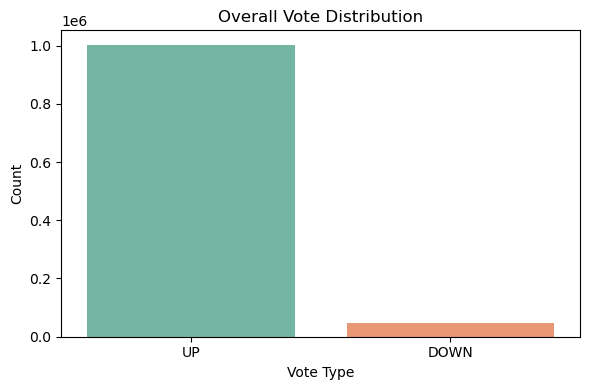

In [4]:
# 1. Overall Vote Distribution
vote_counts = df['state'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=vote_counts.index, y=vote_counts.values, palette="Set2")
plt.title("Overall Vote Distribution")
plt.xlabel("Vote Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##  Explanation

### vote_counts = df['state'].value_counts()
* Counts how many times each vote type (UP, DOWN) appears.
* Gives a quick snapshot of user sentiment across all offers.

### plt.figure(figsize=(6, 4))
* Sets the figure size for better visibility (6 inches wide, 4 inches tall).

### sns.barplot()
* Creates a bar chart:

### x-axis: Vote type (UP/DOWN)
* y-axis: Number of votes
* Uses the "Set2" color palette for better aesthetics.

### plt.title("Overall Vote Distribution")
* Adds a clear title to explain what the chart shows.

### plt.xlabel("Vote Type") / plt.ylabel("Count")
* Labels the axes to clarify what the bars represent.

### plt.tight_layout()
* Ensures the plot layout is neat and avoids overlaps.

### plt.show()
* Renders and displays the chart.

## Conclusion :
## This visualization gives a high-level overview of how users feel after engaging with offers. If the majority of votes are "UP", it indicates good user satisfaction and quality of the offers. It's the first step toward understanding overall engagement health.

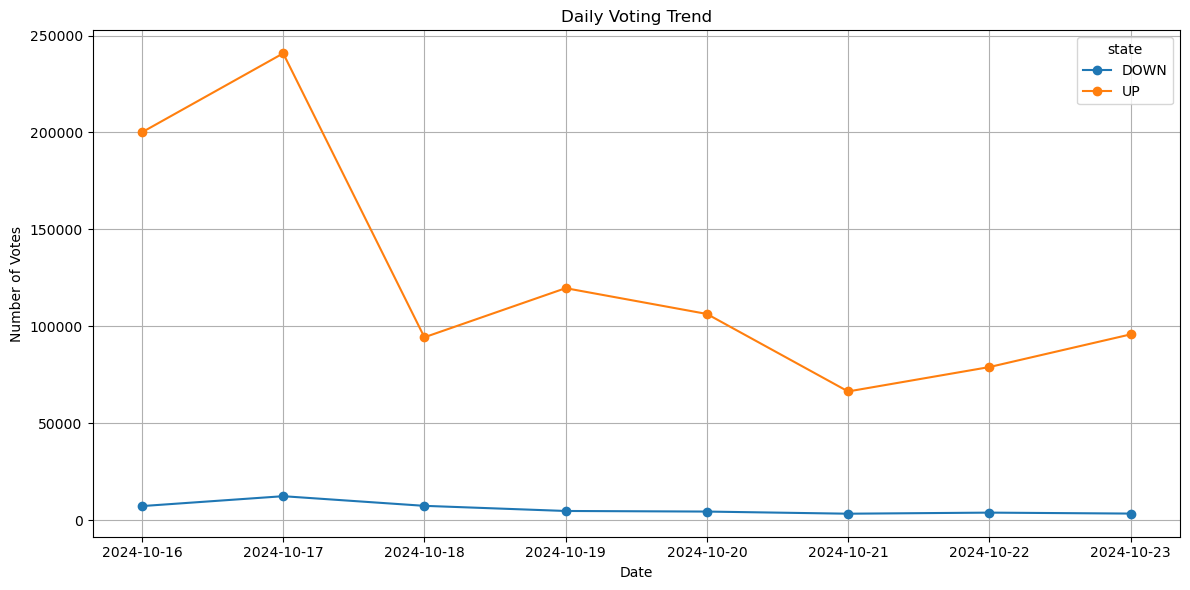

In [5]:
# 2. Daily Voting Trend
daily_votes = df.groupby(['date', 'state']).size().unstack().fillna(0)
daily_votes.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Daily Voting Trend")
plt.xlabel("Date")
plt.ylabel("Number of Votes")
plt.grid(True)
plt.tight_layout()
plt.show()

## Explanation
### df.groupby(['date', 'state']).size()
* Groups the data by each date and vote type (UP, DOWN) and counts the number of votes in each group.
* unstack().fillna(0)
    * Converts the grouped data into a table format (pivoted by state) so that each vote type becomes a separate column.
    * Fills any missing vote counts with 0 to ensure clean plotting.

### daily_votes.plot(kind='line', marker='o', figsize=(12, 6))
* Plots the daily vote counts as a line graph with markers on each point.
* figsize=(12, 6) ensures a wide and clear view of the trend over time.

### plt.title("Daily Voting Trend")
* Sets a meaningful title to describe what the graph represents.

### plt.xlabel("Date") / plt.ylabel("Number of Votes")
* Labels the axes clearly to show what each dimension stands for.

### plt.grid(True)
* Adds a grid for better readability and interpretation of the line trends.

### plt.tight_layout() & plt.show()
* Optimizes spacing and renders the final plot.

## Conclusion :
### This plot helps visualize how user engagement and sentiment evolve over time. For example, we can identify:
* Spikes during promotions or new app launches.
* Drops due to downtime or poor offer experience.
* Days with unusually high downvotes that may require investigation.

#### It’s an essential step in trend analysis and campaign performance monitoring.

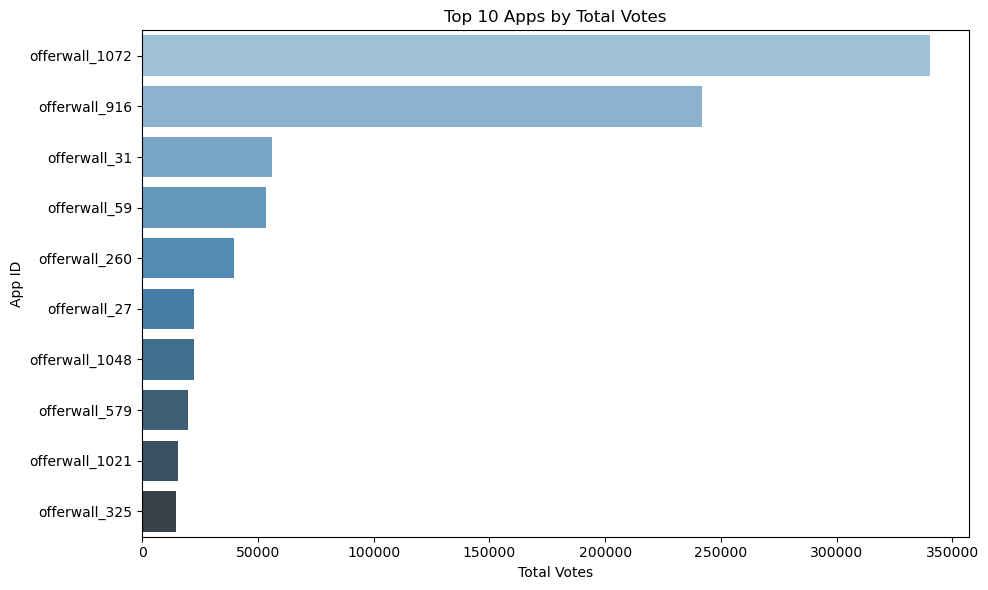

In [6]:
# 3. Top Apps by Vote Count
app_votes = df.groupby(['app_id', 'state']).size().unstack().fillna(0)
app_votes['total'] = app_votes.sum(axis=1)
app_votes['upvote_ratio'] = app_votes['UP'] / app_votes['total']
top_apps = app_votes.sort_values(by='total', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_apps['total'], y=top_apps.index, palette="Blues_d")
plt.title("Top 10 Apps by Total Votes")
plt.xlabel("Total Votes")
plt.ylabel("App ID")
plt.tight_layout()
plt.show()

## Explanation
### df.groupby(['app_id', 'state']).size()
* Groups the data by app_id and vote state (UP/DOWN), then counts the votes per group.
* .unstack().fillna(0)
    * Reshapes the grouped data to make each vote type (UP and DOWN) a separate column.
    * Fills missing values (e.g., apps with only UP votes) with 0.

### app_votes['total'] = app_votes.sum(axis=1)
* Calculates the total number of votes (UP + DOWN) for each app.

### app_votes['upvote_ratio'] = app_votes['UP'] / app_votes['total']
* Computes the proportion of UP votes — an indicator of user satisfaction with that app.

### top_apps = app_votes.sort_values(by='total', ascending=False).head(10)
* Identifies the top 10 apps with the most votes — i.e., the most engaged apps.

## Plotting Horizontal Bar Chart: 
### plt.figure(figsize=(10, 6))
* Sets a wide canvas for better readability.

### sns.barplot(x=top_apps['total'], y=top_apps.index, palette="Blues_d")
* Creates a horizontal bar chart of total votes per app.
* palette="Blues_d" gives a descending blue gradient for a clean, professional look.

### Titles and labels
* It describes what the plot represents: Top 10 apps by user voting activity.

## Conclusion :
### This analysis helps identify which apps:
* Attract the most user engagement.
* Have the highest visibility in your system.
* Could be strong candidates for promotion, case studies, or further QA if feedback is negative.

In [7]:
# 4. Most Controversial Offers (lowest upvote ratios)
offer_votes = df.groupby(['offer_id', 'state']).size().unstack().fillna(0)
offer_votes['total'] = offer_votes.sum(axis=1)
offer_votes = offer_votes[offer_votes['total'] > 100]  # filter low volume
offer_votes['upvote_ratio'] = offer_votes['UP'] / offer_votes['total']
low_rated = offer_votes.sort_values(by='upvote_ratio').head(10)

print("Top 10 Most Downvoted Offers:")
print(low_rated[['UP', 'DOWN', 'total', 'upvote_ratio']])

Top 10 Most Downvoted Offers:
state         UP    DOWN    total  upvote_ratio
offer_id                                       
257832       0.0   385.0    385.0      0.000000
13342       87.0   101.0    188.0      0.462766
254025     141.0   149.0    290.0      0.486207
258668     451.0   450.0    901.0      0.500555
213491    5494.0  5175.0  10669.0      0.514950
139161     246.0   179.0    425.0      0.578824
117436     127.0    78.0    205.0      0.619512
198147     257.0   120.0    377.0      0.681698
260989     421.0   191.0    612.0      0.687908
105434     524.0   234.0    758.0      0.691293


## Explanation
### df.groupby(['offer_id', 'state']).size()
* Groups vote counts by each offer (offer_id) and sentiment (state = UP or DOWN).
* .unstack().fillna(0)
    * Converts the grouped result into a pivoted table where UP and DOWN become columns.
    * Fills missing values (e.g., no UPs or DOWNs for an offer) with 0.

### offer_votes['total'] = offer_votes.sum(axis=1)
* Calculates the total number of votes received by each offer.

### offer_votes = offer_votes[offer_votes['total'] > 100]
* Filters out offers with very few votes (to avoid misleading conclusions based on low volume).
* Ensures statistical significance.

### offer_votes['upvote_ratio'] = offer_votes['UP'] / offer_votes['total']
* Computes the proportion of UP votes for each offer (i.e., satisfaction score).
  
### low_rated = offer_votes.sort_values(by='upvote_ratio').head(10)
* Sorts offers by lowest upvote ratio (most controversial or poorly received).
* Selects the bottom 10 offers for reporting.

### print()
* Displays the final output with counts of UP, DOWN, total votes, and upvote ratio.

## Conclusion :
### This analysis is used to identify poorly performing or controversial offers - those that users engaged with, but ultimately disliked. By focusing on offers with enough vote volume, we avoid reacting to noise and instead get data-backed insights into:
* Offers with misleading rewards or a poor user experience.
* Potential candidates for revision, A/B testing, or removal.
* Early signals of broken user flows or false expectations.

This metric (low upvote ratio + high volume) acts as a negative Net Promoter Score (NPS) for offer design quality.